In [1]:
import pandas as pd
import numpy as np

In [2]:
kto_201901 = pd.read_excel('./kto_201901.xlsx',
                           header = 1,
                          usecols = 'A:G',
                          skipfooter = 4)
kto_201901

,국적,관광,상용,공용,유학/연수,기타,계
0,아시아주,765082,10837,1423,14087,125521,916950
1,일본,198805,2233,127,785,4576,206526
2,대만,86393,74,22,180,1285,87954
3,홍콩,34653,59,2,90,1092,35896
4,마카오,2506,2,0,17,45,2570
...,...,...,...,...,...,...,...
62,아프리카 기타,768,718,90,206,908,2690
63,기타대륙,33,4,0,1,16,54
64,국적미상,33,4,0,1,16,54
65,교포소계,0,0,0,0,15526,15526


In [3]:
kto_201901.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   국적      67 non-null     object
 1   관광      67 non-null     int64 
 2   상용      67 non-null     int64 
 3   공용      67 non-null     int64 
 4   유학/연수   67 non-null     int64 
 5   기타      67 non-null     int64 
 6   계       67 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 3.8+ KB


In [4]:
kto_201901.describe()

,관광,상용,공용,유학/연수,기타,계
count,67.00000,67.000000,67.000000,67.000000,67.000000,67.000000
mean,26396.80597,408.208955,132.507463,477.462687,5564.208955,32979.194030
std,102954.04969,1416.040302,474.406339,2009.484800,17209.438418,122821.369969
min,0.00000,0.000000,0.000000,0.000000,16.000000,54.000000
25%,505.00000,14.500000,2.500000,17.500000,260.000000,927.000000
50%,1304.00000,45.000000,14.000000,43.000000,912.000000,2695.000000
75%,8365.00000,176.500000,38.000000,182.000000,2824.500000,14905.500000
max,765082.00000,10837.000000,2657.000000,14087.000000,125521.000000,916950.000000


In [5]:
condition =(kto_201901['관광'] == 0) |\
            (kto_201901['상용'] == 0) |\
            (kto_201901['공용'] == 0) |\
            (kto_201901['유학/연수'] == 0)
kto_201901[condition]

,국적,관광,상용,공용,유학/연수,기타,계
4,마카오,2506,2,0,17,45,2570
20,이스라엘,727,12,0,9,57,805
22,우즈베키스탄,1958,561,0,407,2828,5754
38,스위스,613,18,0,19,97,747
45,그리스,481,17,4,0,273,775
46,포르투갈,416,14,0,13,121,564
51,크로아티아,226,12,0,3,250,491
54,폴란드,713,10,0,27,574,1324
59,대양주 기타,555,3,4,0,52,614
63,기타대륙,33,4,0,1,16,54


In [6]:
            (kto_201901['상용'] == 0) | \
            (kto_201901['공용'] == 0) | \
            (kto_201901['유학/연수'] == 0)

0     False
1     False
2     False
3     False
4      True
      ...  
62    False
63     True
64     True
65     True
66     True
Length: 67, dtype: bool

In [7]:
kto_201901['기준년월'] = '2019-01'
kto_201901

,국적,관광,상용,공용,유학/연수,기타,계,기준년월
0,아시아주,765082,10837,1423,14087,125521,916950,2019-01
1,일본,198805,2233,127,785,4576,206526,2019-01
2,대만,86393,74,22,180,1285,87954,2019-01
3,홍콩,34653,59,2,90,1092,35896,2019-01
4,마카오,2506,2,0,17,45,2570,2019-01
...,...,...,...,...,...,...,...,...
62,아프리카 기타,768,718,90,206,908,2690,2019-01
63,기타대륙,33,4,0,1,16,54,2019-01
64,국적미상,33,4,0,1,16,54,2019-01
65,교포소계,0,0,0,0,15526,15526,2019-01


In [8]:
kto_201901['국적'].unique()
kto_201901['국적'].value_counts()
kto_201901['국적'].unique()
kto_201901['국적'].nunique()

67

In [9]:
contiunents_list = ['아시아주','미주','구주','대양주','아프리카주','기타대륙','교포소계']

In [10]:
condition = kto_201901['국적'].isin(contiunents_list)
kto_201901[condition==False]
kto_201901_country = kto_201901[~condition]
kto_201901_country.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월
1,일본,198805,2233,127,785,4576,206526,2019-01
2,대만,86393,74,22,180,1285,87954,2019-01
3,홍콩,34653,59,2,90,1092,35896,2019-01
4,마카오,2506,2,0,17,45,2570,2019-01
5,태국,34004,37,199,96,6998,41334,2019-01


In [11]:
kto_201901_country_newindex = kto_201901_country.reset_index(drop=True)
kto_201901_country_newindex.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월
0,일본,198805,2233,127,785,4576,206526,2019-01
1,대만,86393,74,22,180,1285,87954,2019-01
2,홍콩,34653,59,2,90,1092,35896,2019-01
3,마카오,2506,2,0,17,45,2570,2019-01
4,태국,34004,37,199,96,6998,41334,2019-01


In [12]:
continents = ['아시아']* 25+ ['아메리카'] * 5 + ['유럽'] * 23+['오세아니아'] *3 + ['아프리카']*2 +  ['기타대륙']+ ['교포']
continents

kto_201901_country_newindex['대륙'] = continents
kto_201901_country_newindex.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙
0,일본,198805,2233,127,785,4576,206526,2019-01,아시아
1,대만,86393,74,22,180,1285,87954,2019-01,아시아
2,홍콩,34653,59,2,90,1092,35896,2019-01,아시아
3,마카오,2506,2,0,17,45,2570,2019-01,아시아
4,태국,34004,37,199,96,6998,41334,2019-01,아시아


In [13]:
##
kto_201901_country_newindex['관광객비율(%)'] = \
round(kto_201901_country_newindex['관광']/kto_201901_country_newindex['계'] * 100,2)
kto_201901_country_newindex.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%)
0,일본,198805,2233,127,785,4576,206526,2019-01,아시아,96.26
1,대만,86393,74,22,180,1285,87954,2019-01,아시아,98.23
2,홍콩,34653,59,2,90,1092,35896,2019-01,아시아,96.54
3,마카오,2506,2,0,17,45,2570,2019-01,아시아,97.51
4,태국,34004,37,199,96,6998,41334,2019-01,아시아,82.27


In [14]:
kto_201901_country_newindex = kto_201901_country_newindex.sort_values(by = '관광객비율(%)',
                                       ascending = False)
kto_201901_country_newindex.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%)
1,대만,86393,74,22,180,1285,87954,2019-01,아시아,98.23
3,마카오,2506,2,0,17,45,2570,2019-01,아시아,97.51
2,홍콩,34653,59,2,90,1092,35896,2019-01,아시아,96.54
0,일본,198805,2233,127,785,4576,206526,2019-01,아시아,96.26
55,대양주 기타,555,3,4,0,52,614,2019-01,오세아니아,90.39


In [15]:
kto_201901_country_newindex.pivot_table(values = '관광객비율(%)',index = '대륙')

,관광객비율(%)
대륙,
교포,0.000000
기타대륙,61.110000
아메리카,68.196000
아시아,59.618800
아프리카,32.675000
오세아니아,84.806667
유럽,63.823043


In [16]:
kto_201901_country_newindex[kto_201901_country_newindex['국적'] == '중국']

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%)
17,중국,320113,2993,138,8793,60777,392814,2019-01,아시아,81.49


In [17]:
tourist_sum = kto_201901_country_newindex['관광'].sum()
tourist_sum

884293

In [18]:
kto_201901_country_newindex['전체비율(%)'] = round(\
kto_201901_country_newindex['관광'] / tourist_sum*100,1)

In [19]:
kto_201901_country_newindex.sort_values(by = '전체비율(%)',ascending=False)

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
17,중국,320113,2993,138,8793,60777,392814,2019-01,아시아,81.49,36.2
0,일본,198805,2233,127,785,4576,206526,2019-01,아시아,96.26,22.5
1,대만,86393,74,22,180,1285,87954,2019-01,아시아,98.23,9.8
25,미국,42989,418,2578,229,16523,62737,2019-01,아메리카,68.52,4.9
2,홍콩,34653,59,2,90,1092,35896,2019-01,아시아,96.54,3.9
4,태국,34004,37,199,96,6998,41334,2019-01,아시아,82.27,3.8
5,말레이시아,19043,95,7,99,2821,22065,2019-01,아시아,86.30,2.2
47,러시아,17260,181,37,191,7525,25194,2019-01,유럽,68.51,2.0
7,인도네시아,14183,136,38,187,4298,18842,2019-01,아시아,75.27,1.6
6,필리핀,14279,211,161,184,15638,30473,2019-01,아시아,46.86,1.6


In [20]:
def create_kto_data(yy,mm):
    #1 불러올 데이터 형태 파악
    file_path = './kto_{}{}.xlsx'.format(yy,mm)
    #2. 엑셀 파일 파이썬으로 불러오기(pd.read_excel())
    df = pd.read_excel(file_path,header = 1,usecols = 'A:G',skipfooter = 4)
    #3. 데이터 검색
    #df.info()
    #df.describe()
    #4. 기준년월 칼럼 추가
    df['기준년월'] = '{}-{}'.format(yy,mm)
    #5. 국적 데이터만 남기기(대륙 데이터 제거)
    contiunents_list = ['아시아주','미주','구주','대양주','아프리카주','기타대륙','교포소계']
    df = df[~df['국적'].isin(contiunents_list)]
    #6. 대륙 칼럼 만들기
    continents = ['아시아']* 25+ ['아메리카'] * 5 + ['유럽'] * 23+['오세아니아'] *3 + ['아프리카']*2 +  ['기타대륙']+ ['교포']
    df['대륙'] = continents
    #7. 국적별 관광객비율(%) 살펴보기
    df['관광객비율(%)'] = round(df['관광'] / df['계'] * 100,2)
    #8. 전체 외국인 관광객 대비 국적별 관광객 비율 살펴보기
    df['전체비율(%)'] = round(df['관광'] / df['관광'].sum() * 100,2)
    return df
create_kto_data(2018,12)

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
1,일본,252461,1698,161,608,3593,258521,2018-12,아시아,97.66,22.70
2,대만,85697,71,22,266,1252,87308,2018-12,아시아,98.15,7.70
3,홍콩,58355,41,3,208,939,59546,2018-12,아시아,98.00,5.25
4,마카오,6766,0,1,20,36,6823,2018-12,아시아,99.16,0.61
5,태국,47242,42,302,58,6382,54026,2018-12,아시아,87.44,4.25
6,말레이시아,52698,89,3,114,2761,55665,2018-12,아시아,94.67,4.74
7,필리핀,28222,140,127,54,14107,42650,2018-12,아시아,66.17,2.54
8,인도네시아,21276,185,209,141,4278,26089,2018-12,아시아,81.55,1.91
9,싱가포르,38917,105,2,81,1360,40465,2018-12,아시아,96.17,3.50
10,미얀마,1405,8,21,45,4013,5492,2018-12,아시아,25.58,0.13


In [21]:
df = pd.DataFrame()

for yy in range(2010,2021):
    for mm in range(1,13):
        mm_str = str(mm).zfill(2) # 한자리 수는 0을 넣는다
        
        try:
            temp = create_kto_data(str(yy),mm_str)
            df = df.append(temp, ignore_index = True)
        except:
            pass

In [22]:
df.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,96.96,50.60
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.32,8.93
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.39,3.46
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.00,0.14
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.08,3.34


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   국적        7500 non-null   object 
 1   관광        7500 non-null   int64  
 2   상용        7500 non-null   int64  
 3   공용        7500 non-null   int64  
 4   유학/연수     7500 non-null   int64  
 5   기타        7500 non-null   int64  
 6   계         7500 non-null   int64  
 7   기준년월      7500 non-null   object 
 8   대륙        7500 non-null   object 
 9   관광객비율(%)  7500 non-null   float64
 10  전체비율(%)   7500 non-null   float64
dtypes: float64(2), int64(6), object(3)
memory usage: 644.7+ KB


In [24]:
df.to_excel('./kto_total_class.xlsx',index = False)

In [25]:
df['국적'].unique()
df[df['국적'].isin(['대만'])]

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.32,8.93
61,대만,35758,45,18,234,596,36651,2010-02,아시아,97.56,8.01
121,대만,27050,45,12,93,694,27894,2010-03,아시아,96.97,4.96
181,대만,32835,38,8,26,611,33518,2010-04,아시아,97.96,6.04
241,대만,32405,40,8,38,835,33326,2010-05,아시아,97.24,6.17
...,...,...,...,...,...,...,...,...,...,...,...
7201,대만,108623,95,20,285,1331,110354,2020-01,아시아,98.43,10.54
7261,대만,51881,52,11,393,705,53042,2020-02,아시아,97.81,10.29
7321,대만,274,6,1,125,179,585,2020-03,아시아,46.84,0.87
7381,대만,48,8,0,12,87,155,2020-04,아시아,30.97,0.93


In [26]:
for country in df['국적'].unique():
    f = pd.DataFrame() 
    f = df[df['국적'].isin([country])]
    f.to_excel('./kto_{}_class.xlsx'.format(country),index = False)

In [27]:
import matplotlib.pyplot as plt
from matplotlib import rc, font_manager
import seaborn as sns

In [28]:
df_filter = df[df['국적'] == '중국']

df_filter

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아,44.30,10.09
77,중국,60590,7907,68,29546,42460,140571,2010-02,아시아,43.10,13.57
137,중국,50330,13549,174,14924,62480,141457,2010-03,아시아,35.58,9.23
197,중국,84252,13306,212,2199,47711,147680,2010-04,아시아,57.05,15.51
257,중국,89056,12325,360,2931,49394,154066,2010-05,아시아,57.80,16.95
...,...,...,...,...,...,...,...,...,...,...,...
7217,중국,393336,2813,99,10433,75000,481681,2020-01,아시아,81.66,38.17
7277,중국,49520,715,11,20753,33087,104086,2020-02,아시아,47.58,9.83
7337,중국,5040,115,2,7388,4050,16595,2020-03,아시아,30.37,16.00
7397,중국,522,71,0,1112,2230,3935,2020-04,아시아,13.27,10.17


In [29]:
path = 'c:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family = font_name)

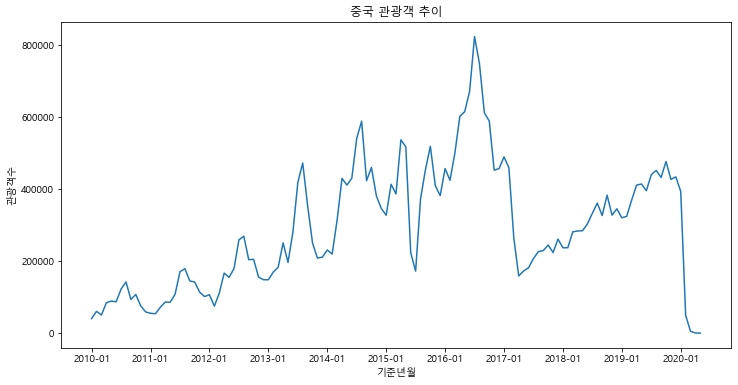

In [36]:
plt.figure(figsize=(12,6))
plt.plot(df_filter['기준년월'],df_filter['관광'])
plt.title('중국 관광객 추이')
plt.xlabel('기준년월')
plt.ylabel('관광객수')
plt.xticks(['2010-01', '2011-01', '2012-01', '2013-01', '2014-01', '2015-01', '2016-01', '2017-01', '2018-01', '2019-01', '2020-01'])
plt.show()

In [37]:
cntry_list = ['중국','일본','대만','미국','홍콩']

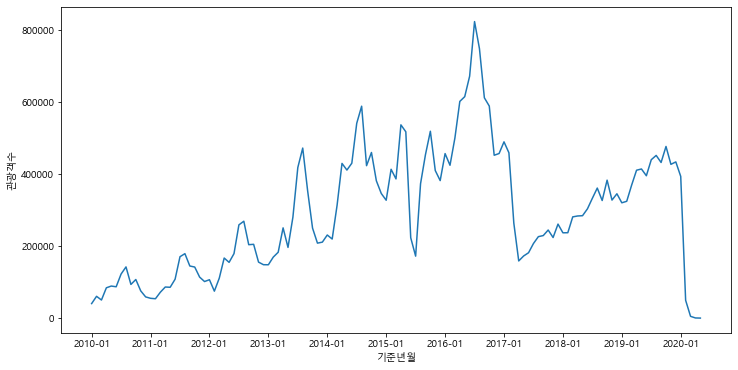

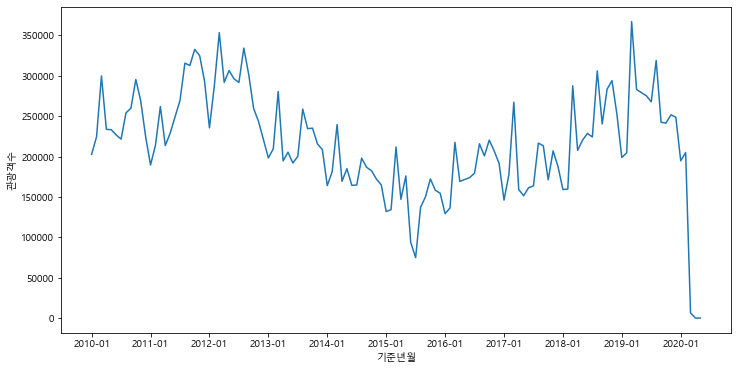

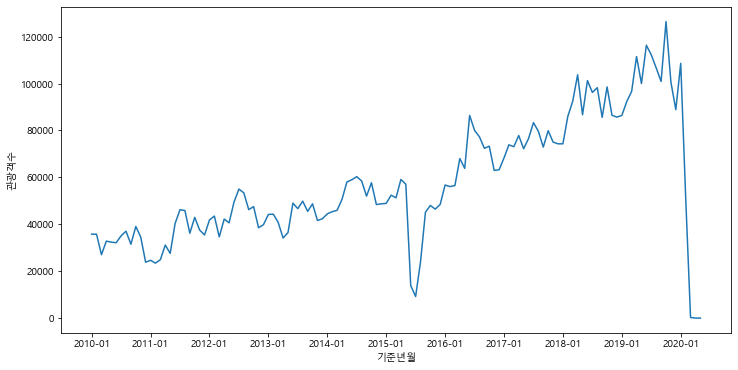

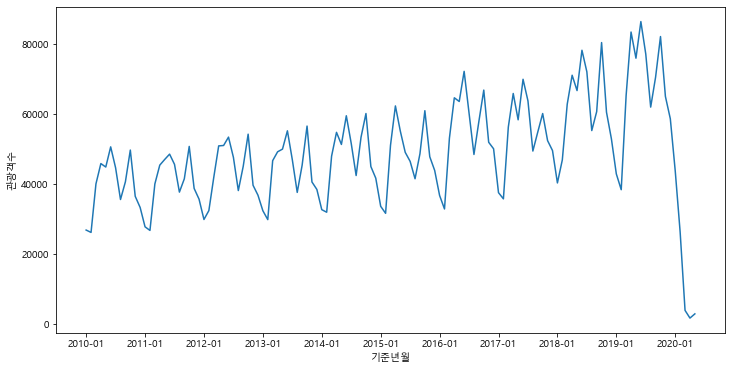

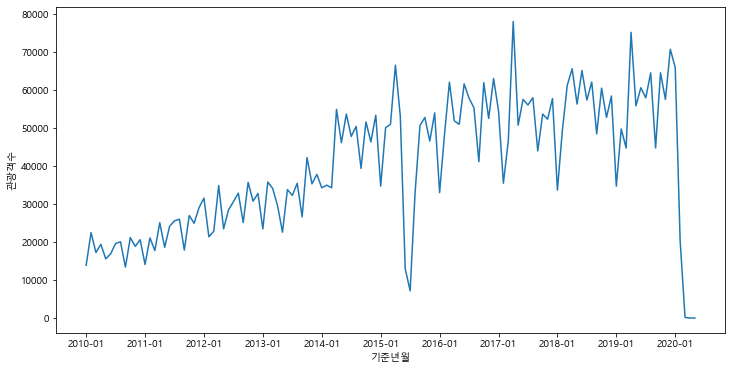

In [39]:
for cntry in cntry_list:
    condition = df['국적'] == cntry
    df_filter = df[condition]
    
    plt.figure(figsize = (12,6))
    
    plt.plot(df_filter['기준년월'],df_filter['관광'])
    plt.xlabel('기준년월')
    plt.ylabel('관광객수')
    plt.xticks(['2010-01', '2011-01', '2012-01', '2013-01', '2014-01', '2015-01', '2016-01', '2017-01', '2018-01', '2019-01', '2020-01'])
    plt.show()

In [40]:
df.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,96.96,50.60
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.32,8.93
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.39,3.46
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.00,0.14
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.08,3.34


In [53]:
df['년도'] = df['기준년월'].str.slice(0,4)
df['월'] = df['기준년월'].str.slice(5,7)

df.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%),년도,월
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,96.96,50.60,2010,01
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.32,8.93,2010,01
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.39,3.46,2010,01
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.00,0.14,2010,01
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.08,3.34,2010,01


In [56]:
condition = df['국적'] == '중국'

df_filter = df[condition]
df_filter.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%),년도,월
17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아,44.30,10.09,2010,01
77,중국,60590,7907,68,29546,42460,140571,2010-02,아시아,43.10,13.57,2010,02
137,중국,50330,13549,174,14924,62480,141457,2010-03,아시아,35.58,9.23,2010,03
197,중국,84252,13306,212,2199,47711,147680,2010-04,아시아,57.05,15.51,2010,04
257,중국,89056,12325,360,2931,49394,154066,2010-05,아시아,57.80,16.95,2010,05


In [57]:
df_pivot=df_filter.pivot_table(values = '관광',
               index = '년도',
               columns = '월',
              aggfunc = 'mean')
df_pivot

월,01,02,03,04,05,06,07,08,09,10,11,12
년도,,,,,,,,,,,,
2010,40425.0,60590.0,50330.0,84252.0,89056.0,87080.0,122432.0,142180.0,93545.0,107237.0,75686.0,58987.0
2011,55070.0,53863.0,72003.0,86397.0,85668.0,108060.0,170524.0,178937.0,144704.0,141824.0,113856.0,101605.0
2012,106606.0,74895.0,110965.0,166843.0,154841.0,179074.0,258907.0,268988.0,203857.0,204866.0,155503.0,148320.0
2013,148118.0,169395.0,182850.0,250549.0,196306.0,280319.0,417991.0,472005.0,353359.0,249850.0,208175.0,210950.0
2014,230706.0,219533.0,313400.0,429419.0,410971.0,429991.0,540683.0,588181.0,423133.0,459708.0,381118.0,345957.0
2015,327225.0,413096.0,386386.0,536428.0,517154.0,223101.0,172075.0,372990.0,453670.0,518651.0,409635.0,381722.0
2016,456636.0,424232.0,500018.0,601460.0,614636.0,671493.0,823016.0,747818.0,611538.0,588561.0,452082.0,456882.0
2017,489256.0,458952.0,263788.0,158784.0,172527.0,181507.0,207099.0,226153.0,229172.0,244541.0,223743.0,260983.0
2018,236825.0,237075.0,281020.0,283533.0,284317.0,303405.0,332657.0,360982.0,326438.0,382922.0,327664.0,345135.0


In [58]:
import seaborn as sns

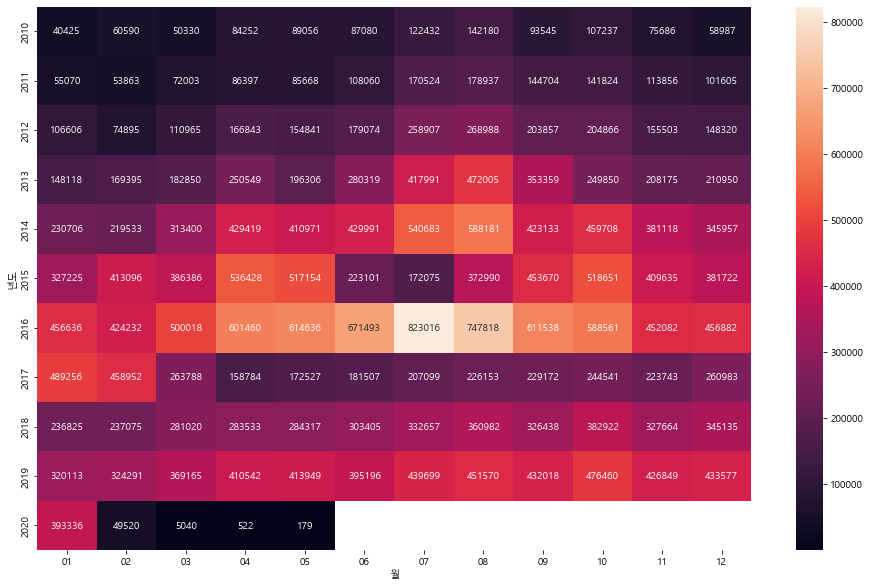

In [70]:
plt.figure(figsize = (16,10))
sns.heatmap(df_pivot,
           annot = True ,# plot 내의 글을 써주겠나,
            fmt = '.0f'
           )
plt.show()

In [71]:
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [83]:
flights_pivot = flights.pivot_table(values = 'passengers',
                                   index = 'year',
                                   columns = 'month',
                                   aggfunc = 'mean')
flights_pivot

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


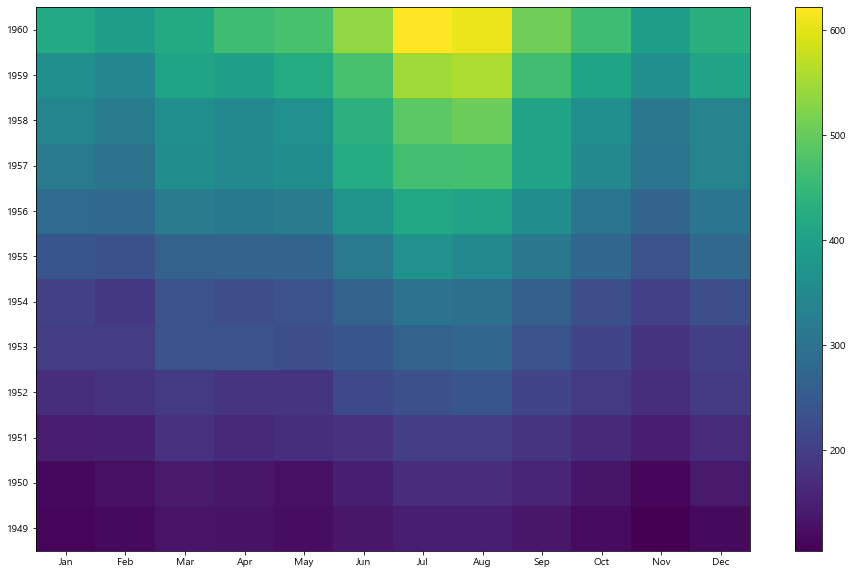

In [116]:
plt.figure(figsize = (16,10))
plt.pcolor(flights_pivot)
plt.xticks(np.arange(0.5, len(flights_pivot[flights_pivot.columns])),flights_pivot.columns)
plt.yticks(np.arange(0.5, len(flights_pivot.index)),flights_pivot.index)
plt.colorbar()
plt.show()

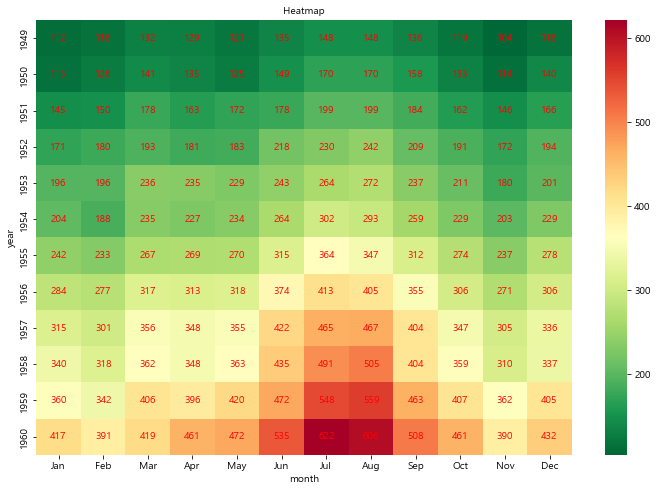

In [103]:
plt.figure(figsize = (12,8))
sns.heatmap(flights_pivot,
           annot = True ,# plot 내의 글을 써주겠나,
            fmt = '.0f',
          cmap = 'RdYlGn_r',
          annot_kws = {'size':10,'color':'red'})
plt.title('Heatmap',fontsize = 10)
plt.show()

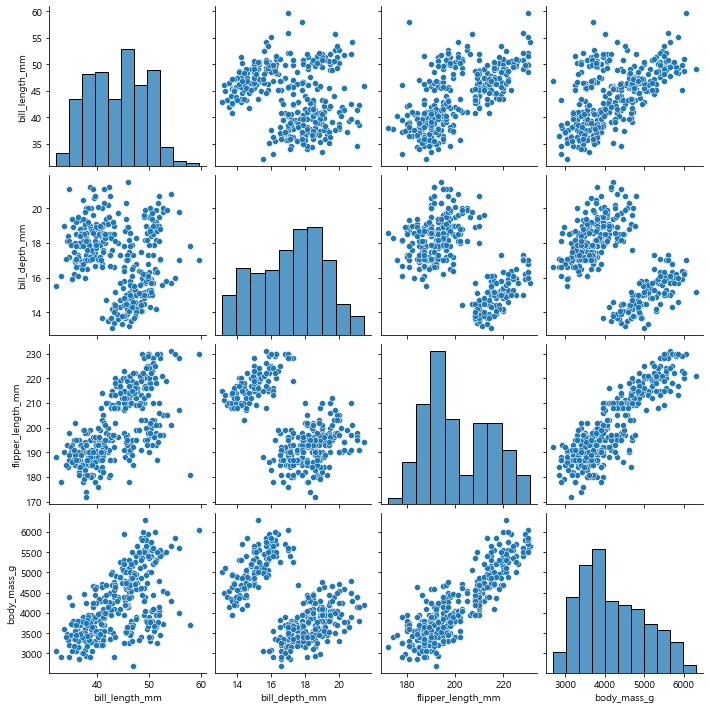

In [114]:
penguins = sns.load_dataset('penguins')
sns.pairplot(penguins)

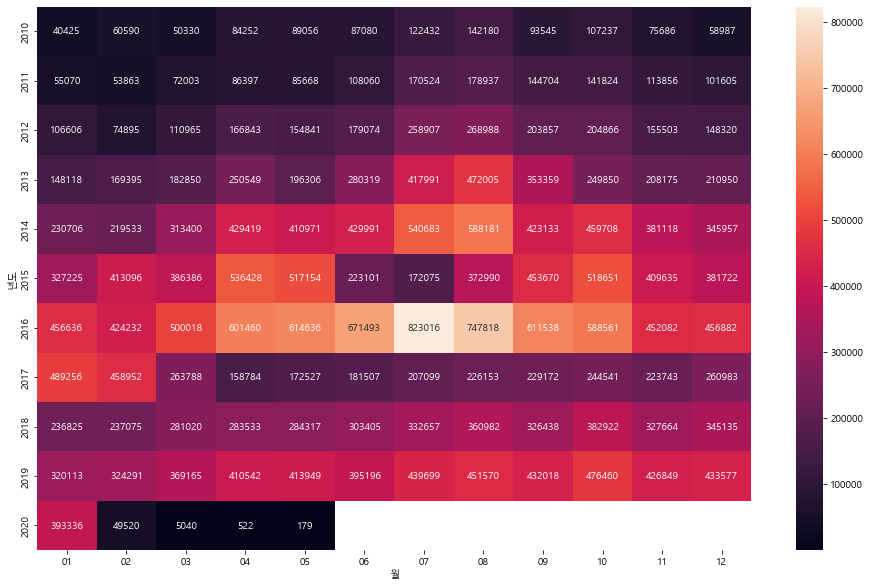

In [108]:
plt.figure(figsize = (16,10))
sns.heatmap(df_pivot,
           annot = True ,# plot 내의 글을 써주겠나,
            fmt = '.0f'
           )
plt.show()

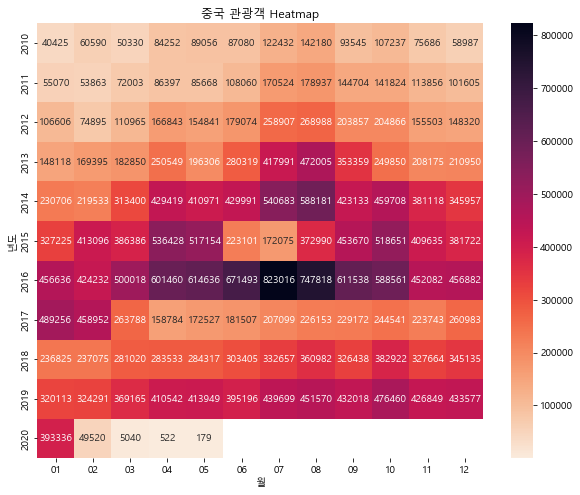

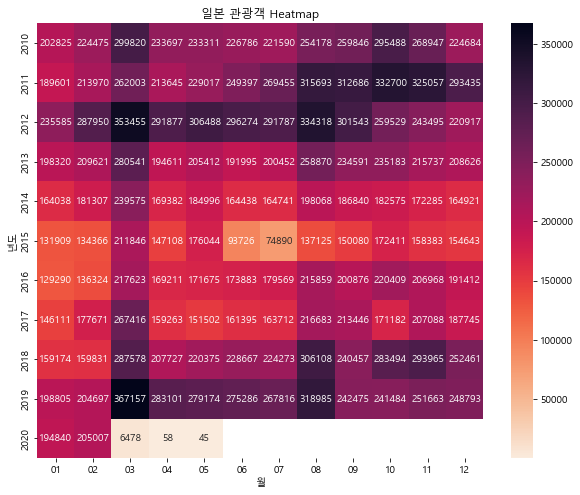

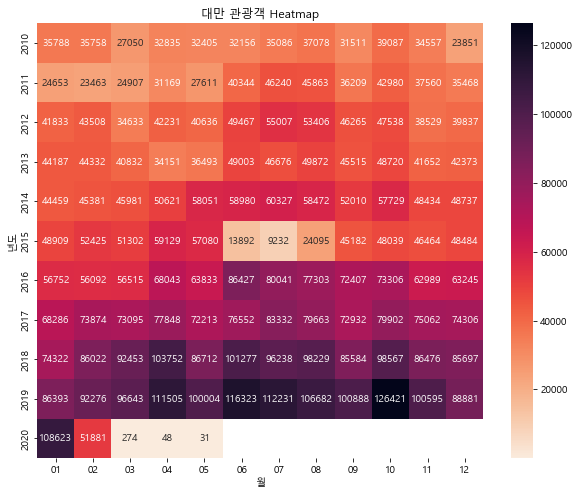

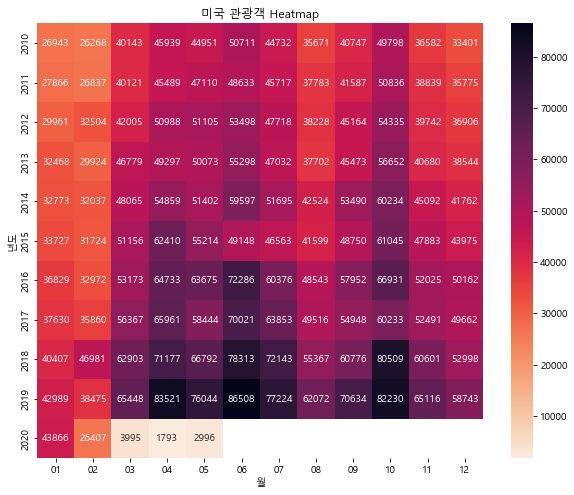

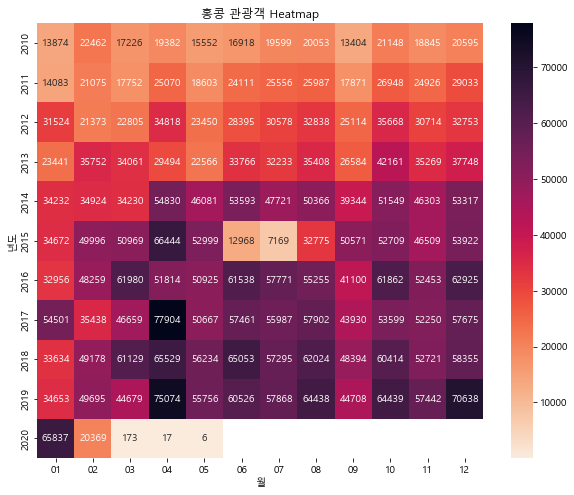

In [117]:
# cntry_list\

for cntry in cntry_list:
    condition = df['국적'] == cntry
    
    df_filter = df[condition]
    
    df_pivot = df_filter.pivot_table(values = '관광',columns = '월',index = '년도')
    plt.figure(figsize = (10,8))
    sns.heatmap(df_pivot,annot = True, fmt = '.0f', cmap = 'rocket_r')
    plt.title('{} 관광객 Heatmap'.format(cntry))
    plt.show()